/var/folders/n8/1wb_pd2n7gxfpl88c3nmtcf40000gn/T/ipykernel_81053/1892099647.py:33: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  mat = nx.linalg.graphmatrix.adjacency_matrix(G_dict[method]).toarray()
/var/folders/n8/1wb_pd2n7gxfpl88c3nmtcf40000gn/T/ipykernel_81053/1892099647.py:33: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  mat = nx.linalg.graphmatrix.adjacency_matrix(G_dict[method]).toarray()


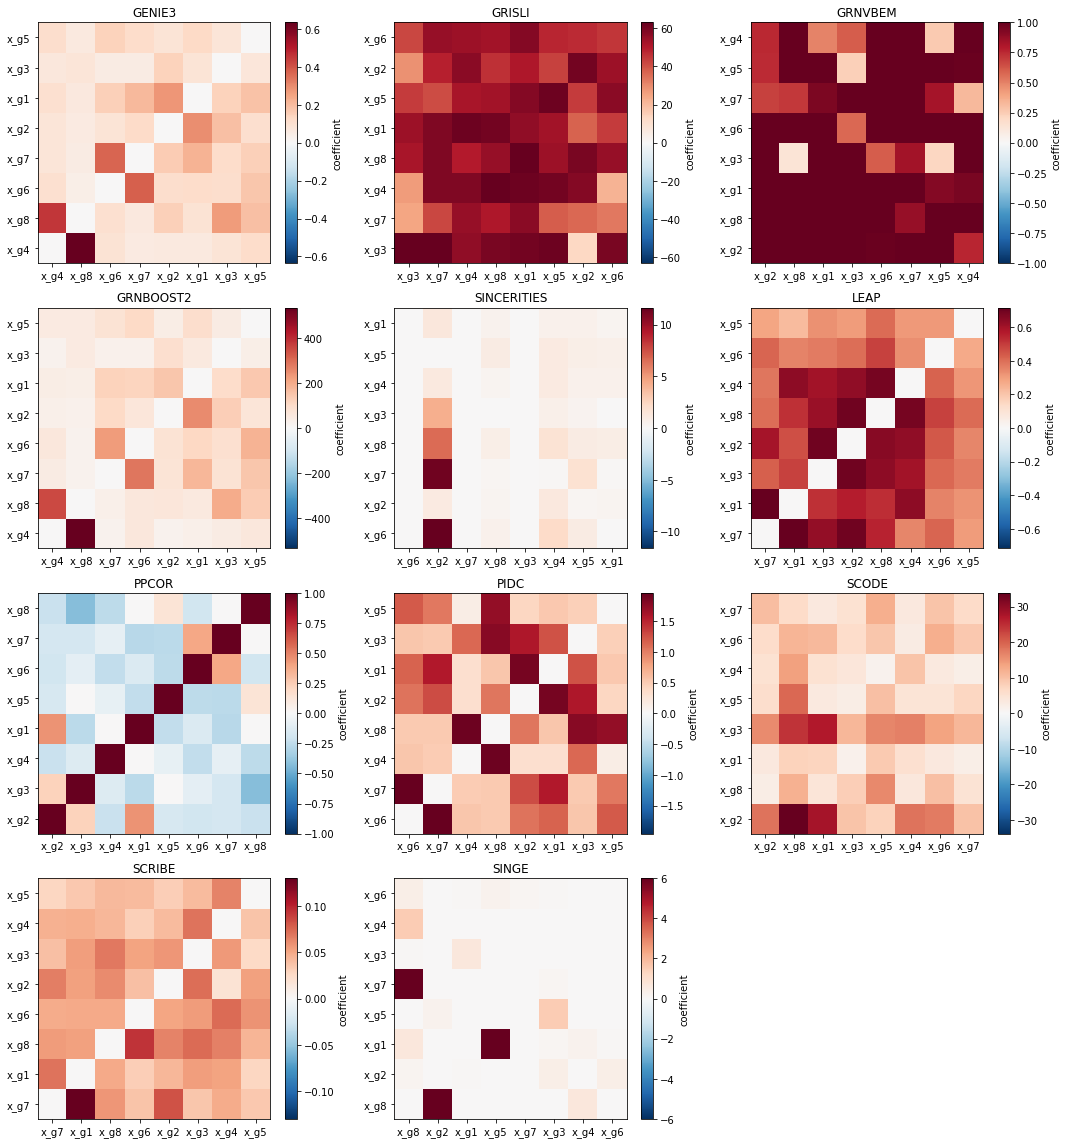

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

methods = ['GENIE3','GRISLI','GRNVBEM','GRNBOOST2','SINCERITIES','LEAP','PPCOR','PIDC','SCODE','SCRIBE','SINGE']

G_dict = {}
for method in methods:
    file_name = "./"+method+"/rankededges.csv"
    result = pd.read_csv(file_name,delimiter = "\t")
    result.columns = ['Gene1','Gene2','weight']
    G = nx.from_pandas_edgelist(result,source = 'Gene1',target = 'Gene2', edge_attr ='weight',create_using = nx.DiGraph)
    G_dict[method] = G

pan_per_row =3

n = len(G_dict.keys())
nrow = int(n / pan_per_row) + 1 if n % pan_per_row > 0 else int(n / pan_per_row)
ncol = max(n % pan_per_row, pan_per_row)
panel_height=4
panel_length=5

fig = plt.figure(figsize=(panel_length * ncol, panel_height * nrow))

for i,method in enumerate(methods):
    # panel coordinates for plotting
    j = int(i / pan_per_row)
    k = i % pan_per_row

    ax = plt.subplot2grid((nrow, ncol), (j, k), rowspan=1, colspan=1)

    mat = nx.linalg.graphmatrix.adjacency_matrix(G_dict[method]).toarray()
    n = int(mat.shape[0] / 2)
    J = mat
    lim = np.amax(np.abs(J))
    x = np.arange(0, J.shape[0] + 1, 1)
    pt = ax.pcolor(x, x, J, cmap='RdBu_r', vmin=-lim, vmax=lim)
    cbar = plt.colorbar(pt, label='coefficient')
    gene_labels = list(G_dict[method].nodes)
    L = len(gene_labels)
    plt.xticks(np.linspace(0.5,L-0.5,num =L).tolist(),gene_labels)
    plt.yticks(np.linspace(0.5,L-0.5,num =L).tolist(),gene_labels)
    plt.title(method)

plt.tight_layout()
plt.show()
